In [1]:
from brainspace.plotting import plot_hemispheres
from brainspace.datasets import load_parcellation
from brainspace.utils.parcellation import map_to_labels 
from brainspace.datasets import load_conte69
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from nilearn import plotting
import seaborn as sns
import nibabel as nb

plt.rcParams["pdf.fonttype"]=42  #export as editable text
plt.rcParams["ps.fonttype"]=42
plt.rcParams["svg.fonttype"]="none" #export as editable text

plt.rc("font",size=10)
#plt.rc("axes", labelsize=22)
#plt.rc("xtick", labelsize=13)
#plt.rc("ytick", labelsize=13)
plt.rcParams['axes.linewidth'] = 1

/data/u_ajohn_software/anaconda3/envs/thalamus_AJ/lib/python3.7/site-packages/nilearn/datasets/__init__.py:96: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  "Numpy arrays.", FutureWarning)


In [3]:
#import lut for schaefer parcellation yeo colors
yeo_networks = np.empty(100, dtype=object)
yeo_networks[0:14]= "VIS"  #1 #Vis
yeo_networks[14:30]= "SoM"  #2 #SomMot
yeo_networks[30:43]= "DAN"  #3 #DorsAtt
yeo_networks[43:54]= "VAN"  #4 #SalVentAtt
yeo_networks[54:60]= "LIM" #5 #Limbic
yeo_networks[60:73]= "FPN" #6 #Fronto-Parietal
yeo_networks[73:100]= "DMN" #7 #Default

# correlation values plotted on cortex
grad1_corr=np.load("/Project1_thalamus_gradients/data/structural_connectivity/parcels_200/grad1_on_cortex_lh.npy")
grad2_corr=np.load("/Project1_thalamus_gradients/data/structural_connectivity/parcels_200/grad2_on_cortex_lh.npy")
fconn1_corr=np.load("/Project1_thalamus_gradients/data/functional_connectivity/corr_grad1_fconn_on_cortex_lh.npy")
fconn2_corr=np.load("/Project1_thalamus_gradients/data/functional_connectivity/corr_grad2_fconn_on_cortex_lh.npy") 
scov1_corr=np.load("/Project1_thalamus_gradients/data/structural_covariance/voxelwise_struc_cov/meanint_corr_grad1_colums_lh.npy")
scov2_corr=np.load("/Project1_thalamus_gradients/data/structural_covariance/voxelwise_struc_cov/meanint_corr_grad2_colums_lh.npy")

In [4]:
data=pd.DataFrame()
data["yeo_networks"]=yeo_networks
data["grad1_corr"]=grad1_corr[0,0:100]
data["grad2_corr"]=grad2_corr[0,0:100]
data["fconn1_corr"]=fconn1_corr[0,0:100]
data["fconn2_corr"]=fconn2_corr[0,0:100]
data["scov1_corr"]=scov1_corr[0,0:100]
data["scov2_corr"]=scov2_corr[0,0:100]

data['yeo_networks'].to_csv('/Project1_thalamus_gradients/data/Decoding_cortex_types/yeo.txt', index=False, header=False)

In [4]:
colors = [(0.470588, 0.0705882, 0.52549),
 (0.27451, 0.509804, 0.705882),
 (0.0, 0.462745, 0.054902),
 (0.768627, 0.227451, 0.980392),
 (0.862745, 0.972549, 0.643137),
 (0.901961, 0.580392, 0.133333),
 (0.803922, 0.243137, 0.305882)]

networks=("VIS", "SoM", "DAN", "VAN", "LIM", "FPN", "DMN")

yeo_colors=pd.DataFrame()
yeo_colors["colors"]=colors
yeo_colors["networks"]=networks
yeo_colors.set_index("networks", inplace=True)
yeo_colors


,colors
networks,
VIS,"(0.470588, 0.0705882, 0.52549)"
SoM,"(0.27451, 0.509804, 0.705882)"
DAN,"(0.0, 0.462745, 0.054902)"
VAN,"(0.768627, 0.227451, 0.980392)"
LIM,"(0.862745, 0.972549, 0.643137)"
FPN,"(0.901961, 0.580392, 0.133333)"
DMN,"(0.803922, 0.243137, 0.305882)"


In [5]:
yeo = np.zeros((1,200))
yeo[0,0:14]= 1   #Vis
yeo[0,14:30]= 2  #SomMot
yeo[0,30:43]= 3  #DorsAtt
yeo[0,43:54]= 4  #SalVentAtt
yeo[0,54:60]= 5  #Limbic
yeo[0,60:73]= 6  #Fronto-Parietal
yeo[0,73:100]= 7 #Default

In [6]:
colors = [(0,0,0),
 (0.470588, 0.0705882, 0.52549),
 (0.27451, 0.509804, 0.705882),
 (0.0, 0.462745, 0.054902),
 (0.768627, 0.227451, 0.980392),
 (0.862745, 0.972549, 0.643137),
 (0.901961, 0.580392, 0.133333),
 (0.803922, 0.243137, 0.305882)]
from matplotlib.colors import ListedColormap
cmap= ListedColormap(colors)

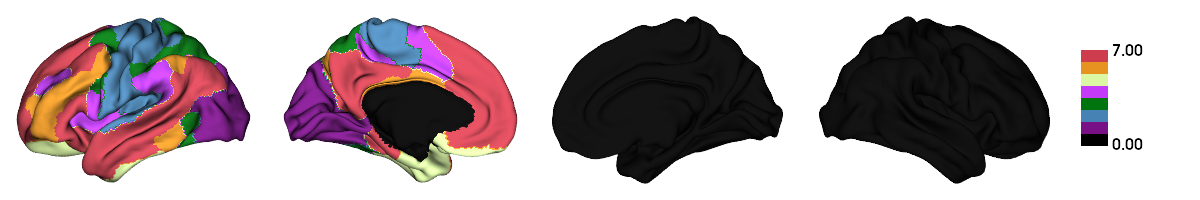

In [7]:
surf_lh, surf_rh = load_conte69()
labeling = load_parcellation('schaefer', scale=200, join=True)
mask = labeling != 0
grad = map_to_labels(yeo[0,:], labeling, mask , fill=np.nan)

plot_hemispheres(surf_lh, surf_rh, array_name=grad,
                 cmap=cmap,color_bar=True,
                 background=(1,1,1),size=(1200,200),zoom=1.5,
                 embed_nb=True,
                 interactive=False,
                 screenshot=False, 
                 transparent_bg=True,
                 filename = "/Project1_thalamus_gradients/plots/figure3/yeo.png")


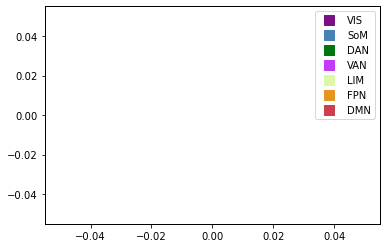

In [8]:
colors = [
 (0.470588, 0.0705882, 0.52549),
 (0.27451, 0.509804, 0.705882),
 (0.0, 0.462745, 0.054902),
 (0.768627, 0.227451, 0.980392),
 (0.862745, 0.972549, 0.643137),
 (0.901961, 0.580392, 0.133333),
 (0.803922, 0.243137, 0.305882)]
from matplotlib.colors import ListedColormap
cmap= ListedColormap(colors)
for label, col in zip(networks, colors):
    plt.plot([], [], label=label, color=col, marker="s",linestyle="", markersize=10)  # Create empty plot with marker# Create the legend
plt.legend()# Display the legend
plt.savefig("/Project1_thalamus_gradients/plots/figure3/yeo_legend.pdf", transparent=True, format='pdf', dpi=600)


## G1

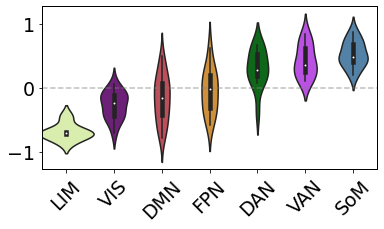

In [9]:
order = data.groupby('yeo_networks')['grad1_corr'].mean().sort_values().index
yeo_colors_ordered=yeo_colors.reindex(order)
colors = yeo_colors_ordered['colors'].values.tolist()

fig, ax = plt.subplots(figsize=(6,3))
ax.axhline(0, linestyle='--', color='grey', alpha=0.5)
sns.violinplot(data=data, x='yeo_networks', y='grad1_corr', 
               order = order,
               palette=colors, 
               width=1.15, ax=ax)
ax.tick_params(axis='x', labelsize=19, rotation = 45)
ax.tick_params(axis='y', labelsize=19)
ax.set_xlabel('')
ax.set_ylabel('')
plt.savefig("/Project1_thalamus_gradients/plots/figure3/grad1_violin.svg", transparent=True, format='svg')

## G2

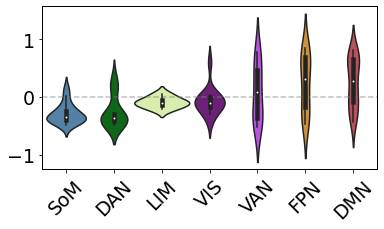

In [10]:
order = data.groupby('yeo_networks')['grad2_corr'].mean().sort_values().index
yeo_colors_ordered=yeo_colors.reindex(order)
colors = yeo_colors_ordered['colors'].values.tolist()

fig, ax = plt.subplots(figsize=(6,3))
ax.axhline(0, linestyle='--', color='grey', alpha=0.5)
sns.violinplot(data=data, x='yeo_networks', y='grad2_corr', 
               order = order,
               palette=colors, 
               width=1.15, ax=ax)
ax.tick_params(axis='x', labelsize=19, rotation = 45)
ax.tick_params(axis='y', labelsize=19)
ax.set_xlabel('')
ax.set_ylabel('')
plt.savefig("/Project1_thalamus_gradients/plots/figure3/grad2_violin.svg", transparent=True, format='svg')

## Functional Connectivity

## G1

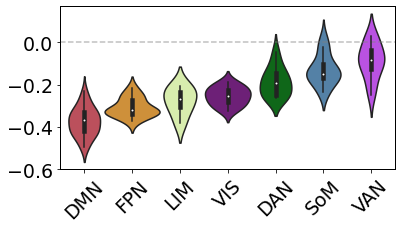

In [11]:
order = data.groupby('yeo_networks')['fconn1_corr'].mean().sort_values().index
yeo_colors_ordered=yeo_colors.reindex(order)
colors = yeo_colors_ordered['colors'].values.tolist()

fig, ax = plt.subplots(figsize=(6,3))
ax.axhline(0, linestyle='--', color='grey', alpha=0.5)
sns.violinplot(data=data, x='yeo_networks', y='fconn1_corr', 
               order = order,
               palette=colors, 
               width=1.15, ax=ax)
ax.tick_params(axis='x', labelsize=19, rotation = 45)
ax.tick_params(axis='y', labelsize=19)
ax.set_xlabel('')
ax.set_ylabel('')
plt.savefig("/Project1_thalamus_gradients/plots/figure3/fconn1_violin.svg", transparent=True, format='svg')

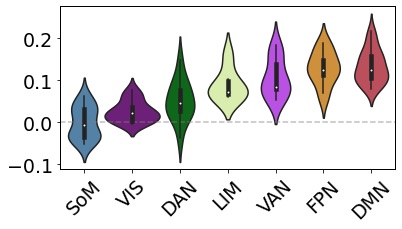

In [14]:
order = data.groupby('yeo_networks')['fconn2_corr'].mean().sort_values().index
yeo_colors_ordered=yeo_colors.reindex(order)
colors = yeo_colors_ordered['colors'].values.tolist()

fig, ax = plt.subplots(figsize=(6,3))
ax.axhline(0, linestyle='--', color='grey', alpha=0.5)
sns.violinplot(data=data, x='yeo_networks', y='fconn2_corr', 
               order = order,
               palette=colors, 
               width=1.15, ax=ax)
ax.tick_params(axis='x',labelsize=19, rotation = 45)
ax.tick_params(axis='y', labelsize=19)
ax.set_xlabel('')
ax.set_ylabel('')
plt.savefig("/Project1_thalamus_gradients/plots/figure3/fconn2_violin.svg", transparent=True, format='svg')

## Structural Covariance

## G1

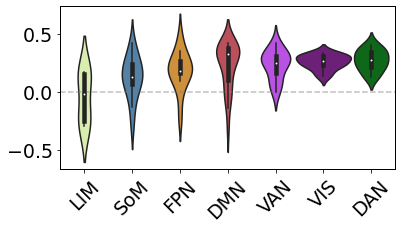

In [15]:
order = data.groupby('yeo_networks')['scov1_corr'].mean().sort_values().index
yeo_colors_ordered=yeo_colors.reindex(order)
colors = yeo_colors_ordered['colors'].values.tolist()

fig, ax = plt.subplots(figsize=(6,3))
ax.axhline(0, linestyle='--', color='grey', alpha=0.5)
sns.violinplot(data=data, x='yeo_networks', y='scov1_corr', 
               order = order,
               palette=colors, 
               width=1.15, ax=ax)
ax.tick_params(axis='x', labelsize=19, rotation = 45)
ax.tick_params(axis='y', labelsize=19)

ax.set_xlabel('')
ax.set_ylabel('')
plt.savefig("/Project1_thalamus_gradients/plots/figure3/scov1_violin.svg", transparent=True, format='svg')

## G2

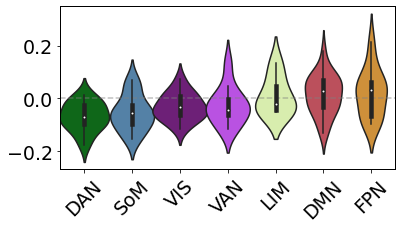

In [16]:
order = data.groupby('yeo_networks')['scov2_corr'].mean().sort_values().index
yeo_colors_ordered=yeo_colors.reindex(order)
colors = yeo_colors_ordered['colors'].values.tolist()

fig, ax = plt.subplots(figsize=(6,3))
ax.axhline(0, linestyle='--', color='grey', alpha=0.5)
sns.violinplot(data=data, x='yeo_networks', y='scov2_corr', 
               order = order,
               palette=colors, 
               width=1.15, ax=ax)
ax.tick_params(axis='x', labelsize=19, rotation = 45)
ax.tick_params(axis='y', labelsize=19)

ax.set_xlabel('')
ax.set_ylabel('')
plt.savefig("/Project1_thalamus_gradients/plots/figure3/scov2_violin.svg", transparent=True, format='svg')